# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

## Imports and set magics

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## Question 1

First of all, we import the optimize function from the scipy package and we define the various parameters assigning the values from question 1 of the assignment.
We randomly give the value 1 to the wage ratio w. We solve the maximization problem coding the utility function and subsequently the total resources constraint, the objective function and the optimizer. As the optimize function works for minimization problems, we enter utility with a negative sign in "opt_choice".

In [12]:
from scipy import optimize

#a. Defining parameters value

m = 1 #cash-on-hand
v = 10 #scale the disutility of labour
eps = 0.3   #Frish-elasticity
t_0 = 0.4  #standard labour income tax
t_1 = 0.1 #top bracket labour income tax
kappa = 0.4 #cut-off for the top labour income bracket
w =  1 #rate-wage

#b. Defining utility
def util(c,v,l,eps):
    return np.log(c) - v*(l**(1+(1/eps)))/(1+(1/eps))

#c. Defining constraint
def cash_constr(m, t_0, t_1, w, l, kappa):
    return m + w*l - (t_0*w*l + t_1*max(w*l - kappa, 0))

#d. Defining objective function
def optimal_choice( l, w, eps, t_0, t_1, kappa, v):
    c = cash_constr(m, t_0, t_1, w, l, kappa)
    return - util(c , v, l, eps)

#e. Calling optimizer and calculate optimum
def opt_problem(m, w, eps, v, t_0, t_1, kappa):
    res = optimize.minimize_scalar(optimal_choice, method='bounded', bounds=(0,1), args=(w, eps, t_0, t_1, kappa, v))    

    #e.1 Calculate optimal l,x,u
    l = res.x
    c = cash_constr(m, t_0, t_1, w, l, kappa)
    ut = util(c, v, l, eps)
    return l, c, ut

optimal_l = opt_problem(m, w, eps, v, t_0, t_1, kappa)[0]
optimal_c = opt_problem(m, w, eps, v, t_0, t_1, kappa)[1]
optimal_ut = opt_problem(m, w, eps, v, t_0, t_1, kappa)[2]

#f. Printing results
print(f'Optimal labour supply is: {optimal_l:.3f}')
print(f'Optimal consumption is: {optimal_c:.3f}')
print(f'maximized utility is: {optimal_ut:.3f}')

Optimal labour supply is: 0.400
Optimal consumption is: 1.240
maximized utility is: 0.172


# Question 2

We realize two graphs: the left picture captures the relationship between the wage rate and the optimal consumption, meanwhile the right graph the relationship between the wage rate and the optimal supply of labour.
From the figures we can detect that both optimal consumption and labour supply tend to increase when the wage rate increases.


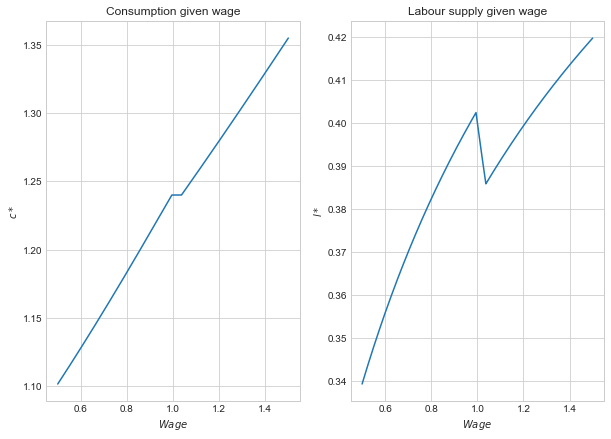

In [13]:
#a. Setting

N=10000
w_min = 0.5
w_max=1.5

w_values = np.linspace(w_min, w_max, N)
c_values = np.empty(N)
l_values = np.empty(N)

for i,w in enumerate(w_values):
    ver=opt_problem(m, w, eps, v, t_0, t_1, kappa)
    l_values[i]=ver[0]
    c_values[i]=ver[1]

fig = plt.figure(figsize=(10,7))

#b. Left figure
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_values,c_values)
ax_left.set_title('Consumption given wage')
ax_left.set_xlabel('$Wage$')
ax_left.set_ylabel('$c*$')
ax_left.grid(True)

#c. Right figure
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_values,l_values)
ax_right.set_title('Labour supply given wage')
ax_right.set_xlabel('$Wage$')
ax_right.set_ylabel('$l*$')
ax_right.grid(True)

#d. Show pictures
plt.show()


# Question 3

We calcute the total tax revenue. Firstly, we draw a random vector of individual values $w_i$ from the range defined in the problem. Afterwards we define the tax revenue function obtained using the optimal value $l^{*}$and the values for $\tau_0$, $\tau_1$ and $k$. 
We find the tax amount for each individual $i$ and then we sum them all. The total tax revenue is approximately 1630.

In [15]:
#a. Defining vector of random wages
w_min = 0.5
w_max=1.5
np.random.seed(2000)
wi_values = np.random.uniform(w_min, w_max, size=10000)

#b. Defining total tax revenue function 
def Tot_tax(wagevector, m, v, eps, t_0, t_1, kappa):
    N=len(wagevector)
    Poptax = np.zeros((N))

    for i,w in enumerate(wagevector):
        worker_opt = opt_problem(m, w, eps, v, t_0, t_1, kappa)
        worker_lab = worker_opt[0]
        #individual tax payment based on optimal labour
        Poptax[i] = t_0*w*worker_lab+t_1*max(w*worker_lab-kappa,0)
    
    Total_taxes_revenue = sum(Poptax)
    
    return Total_taxes_revenue

#c. Total tax revenue with random wages following a uniform distribution
Taxes = Tot_tax(wi_values, m, v, eps, t_0, t_1, kappa)
print(f'The total tax revenue is {Taxes:.3f}')

The total tax revenue is 1626.991


# Question 4

We measure the effects of a change in the Frish-elasticity (eps) on labor supply and on the tax revenue.
In particular, we expect an increase in the total tax revenue as the elasticity decreases (as we can easily notice from the labor supply formula). The total tax revenue is now approximately 3190.

In [5]:
#a. New Frisch elasticity
eps1 = 0.1

#b. New Total tax revenue with random wages following a uniform distribution
Taxes_new = Tot_tax(wi_values, m, v, eps1, t_0, t_1, kappa)
print(f'The total tax revenue is {Taxes_new:.3f}')


The total tax revenue is 3190.792


# Question 5

To answer this question, we should maximize the tax revenue with the purpose of finding the optimal $t_0$, $t_1$, and $k$. Function tax_rev returns the negative of the total tax revenue function defined in *Question 4* as the function "optimize" works for minimization problems.

In [18]:
#a. Defining a smaller population size to fasten calculation
wi_values1 = np.random.uniform(w_min, w_max,size=1000)

#b. Defining revenue function
def tax_rev(pol, wagevalues, m, v, eps):
    t_0 = pol[0]
    t_1 = pol[1]
    kappa = pol[2]
    return -Tot_tax(wagevalues, m, v, eps, t_0, t_1, kappa)

#c. Defining optimizer
def taxoptimization(wagevalues, m, v, eps):
    
    # Bounds for t_0, t_1 and kappa
    bounds = ((0,1),(0,1),(0,1)) #It doesn't have sense to have a tax or cut-off lower than 0 or higher than 1.

    # Initial guesses for t_0, t_1 and kappa taken from question 1
    init_values = [0.4,0.1,0.4]

    # Calculate the optimal teta_0, teta_1 and kappa
    solution = optimize.minimize(tax_rev, init_values, method='SLSQP', bounds= bounds, args=(wagevalues, m, v, eps))

    opt_t_0 = solution.x[0]
    opt_t_1 = solution.x[1]
    opt_kappa = solution.x[2]

    # Print solutions
    print(f'Optimal standard labour income tax is {opt_t_0:.3f}')
    print(f'Optimal top bracket labour income tax is {opt_t_1:.3f}')
    print(f'Optimal cut-off (kappa) is {opt_kappa:.3f}')

    return[opt_t_0, opt_t_1,opt_kappa]

#d. Final results
[opt_t_0, opt_t_1, opt_kappa]= taxoptimization(wi_values1, m, v, eps)
Totaltaxamount = Tot_tax(wi_values1, m, v, eps, opt_t_0, opt_t_1, opt_kappa)
print(f'Total tax revenue = {Totaltaxamount:.3f}')

Optimal standard labour income tax is 0.785
Optimal top bracket labour income tax is 0.000
Optimal cut-off (kappa) is 0.083
Total tax revenue = 246.393


# Conclusion

In *Question 1* we maximized utility subject to our total resources constraint and found the optimal labor supply and consumption given certain parameters values.  
In *Question 2* we saw that increasing wages led to higher consumption and labour supply.  
In *Question 3* we calculated the total tax revenues for a population of 10000 individuals. 
Subsequently we lowered the Frisch elasticity, resulting in a higher tax revenue. This happens because labor supply becomes more inelastic implying that agent is willing to supply more labor.
Finally, in *Question 5* we found the optimal standard labour income tax, the top bracket labour income tax and cut off. If politicians increase the lower tax rate while decreasing the upper tax rate, total revenue will increase. 